<h1 align="center"><strong>Ejercicio 02 - Mejoramiento de imagenes</strong></h1>

- Autor: [Renzo Guerrero Huayta](https://github.com/renzoguerrero17)
- Problemas extraídos del curso Fundamentos del procesamiento de imágenes de la Universidad Católica de Chile.

# Ejercicio 1

Mejorar el contraste de la imagen.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap03_Mejoramiento_Espacio\imagenes")

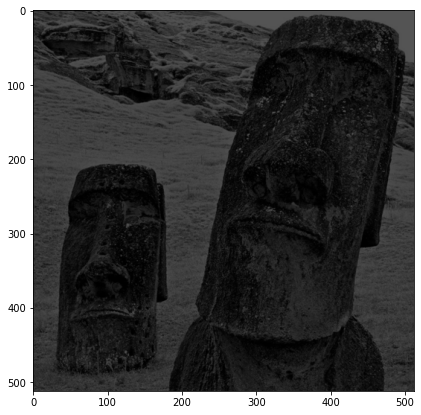

(512, 512, 3)


In [3]:
IMG01 = cv2.imread("./IMG01.png",1)
plt.figure(1,figsize=(7,7))
plt.imshow(IMG01)
plt.show()
print(IMG01.shape) # imagen de 3 canales(BGR) con los mismos valores en cada canal (R == G == B)
# Cuando los valores de las tres componentes del RGB tienen el mismo valor, la imagen se "pinta como tonos de gris"
# Cuando las tres componentes tienen valores similares y bajos se pinta como tono oscuro(negro)
# Cuando las tres componentes tienen valores similares y altos se pinta como tono claro(balnco)

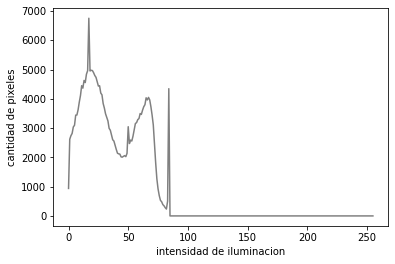

In [4]:
# Histograma inicial
hist = cv2.calcHist([IMG01], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

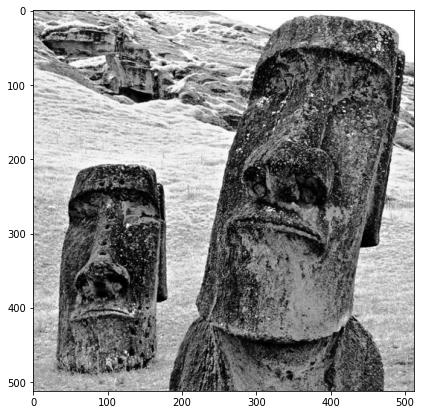

(512, 512, 3)


In [5]:
IMG01_mejorada_R = cv2.equalizeHist(IMG01[:,:,0])
IMG01_mejorada_G = cv2.equalizeHist(IMG01[:,:,1])
IMG01_mejorada_B = cv2.equalizeHist(IMG01[:,:,2])
IMG01_mejorada = np.stack((IMG01_mejorada_R,IMG01_mejorada_G,IMG01_mejorada_B),axis = 2)
plt.figure(1,figsize=(7,7))
plt.imshow(IMG01_mejorada, cmap='gray')
plt.show()
print(IMG01_mejorada.shape)

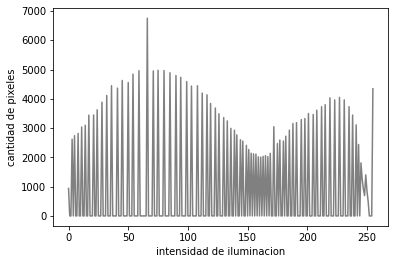

In [6]:
# Histograma final(ecualizado)
hist = cv2.calcHist([IMG01_mejorada], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

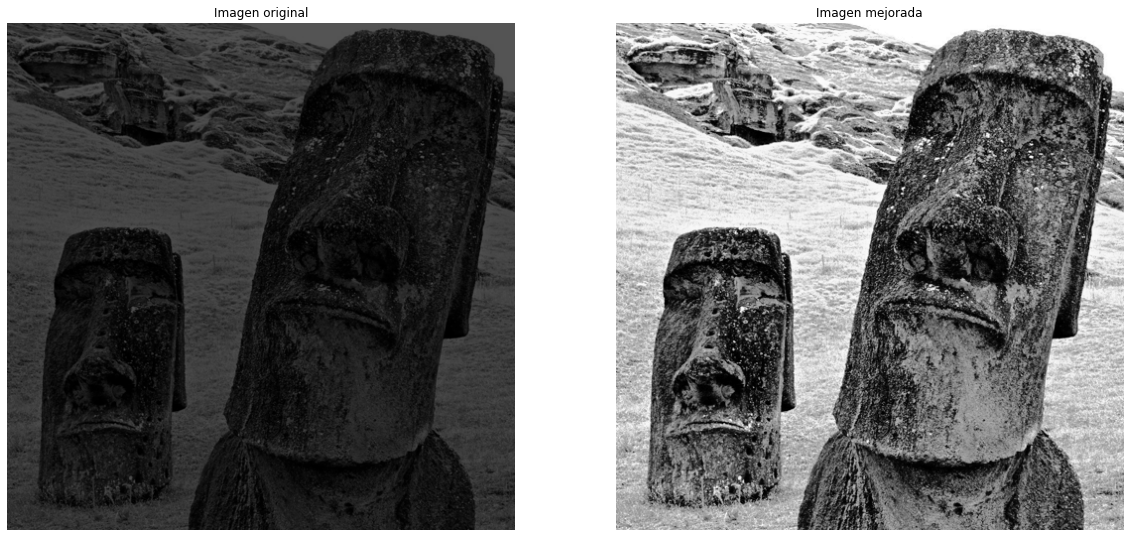

In [7]:
plt.figure(1,figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(IMG01, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Imagen mejorada")
plt.imshow(IMG01_mejorada, cmap='gray')
plt.axis('off')
plt.show()

# Ejercicio 2

A partir de la imagen de entrada genere una serie de 9 imagenes, i = 0,1, ... 8; donde la imagen i es la rotacion de la imagen de entrada en 40 x i grados (el eje de rotacion es el centro de la imagen). Finalmente, promedie la 9 imagenes.

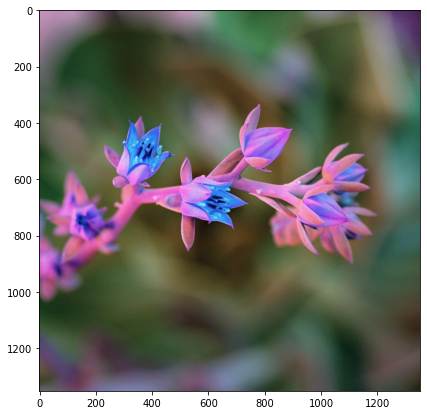

(1352, 1352, 3)


In [8]:
IMG02 = cv2.imread("./IMG02.png",1)
alto = IMG02.shape[0] # filas Y
ancho = IMG02.shape[1] #columnas X
plt.figure(1,figsize=(7,7))
plt.imshow(IMG02)
plt.show()
print(IMG02.shape)

In [9]:
def Normalizar(f):
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    g = (faux-minimum)*(255) / (maximum-minimum)
    r = g.reshape(f.shape).astype(np.uint8)
    return(r)

In [10]:
# Rotación

def Mandala(n,angle,imagen):
    alto = imagen.shape[0] # filas Y
    ancho = imagen.shape[1]
    image_Out = np.zeros((alto,ancho,3))
    count = 0
    for i in range(0,n):
        M = cv2.getRotationMatrix2D((ancho//2,alto//2),angle*i,1)
        image_rotada = cv2.warpAffine(imagen,M,(ancho,alto))
        image_Out = image_rotada +  image_Out
        count = count +1
    if count == 9:
        image_Out = image_Out//9
        image_Out = Normalizar(image_Out)
        plt.figure(1,figsize=(7,7))
        plt.title("Mandala")
        plt.imshow(image_Out)
        plt.show()

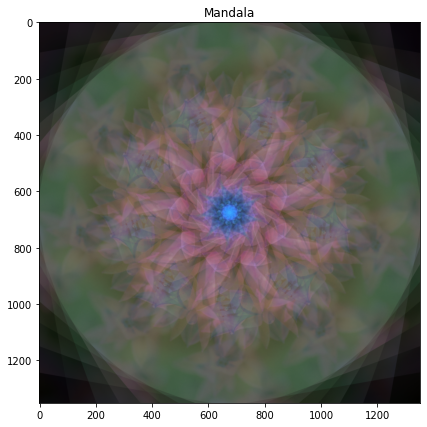

In [11]:
Mandala(9,40,IMG02)

# Ejercicio 3
Deteccion de bordes

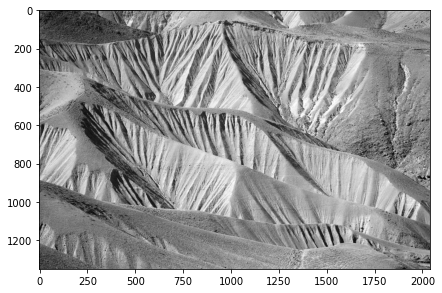

(1350, 2040, 3)


In [12]:
IMG03 = cv2.imread("./IMG03.png",1)
plt.figure(1,figsize=(7,7))
plt.imshow(IMG03)
plt.show()
print(IMG03.shape)

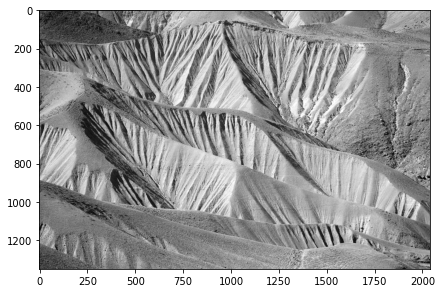

(1350, 2040)


In [13]:
# Pasamos a escala de grises
grays = cv2.cvtColor(IMG03,cv2.COLOR_BGR2GRAY)
plt.figure(1,figsize=(7,7))
plt.imshow(grays,cmap='gray')
plt.show()
print(grays.shape)

In [14]:
# Máscaras
m_X = np.array([[-1,-1,0,1,1]])
m_Y = m_X.T

# Gradiente en X
G_X = cv2.filter2D(grays,-1,m_X) # bordes verticales

# Gradiente en Y
G_Y = cv2.filter2D(grays,-1,m_Y) # bordes horizontales

# Gradiente resultante
G = G_X + G_Y
G = np.array(G,dtype=np.uint8)

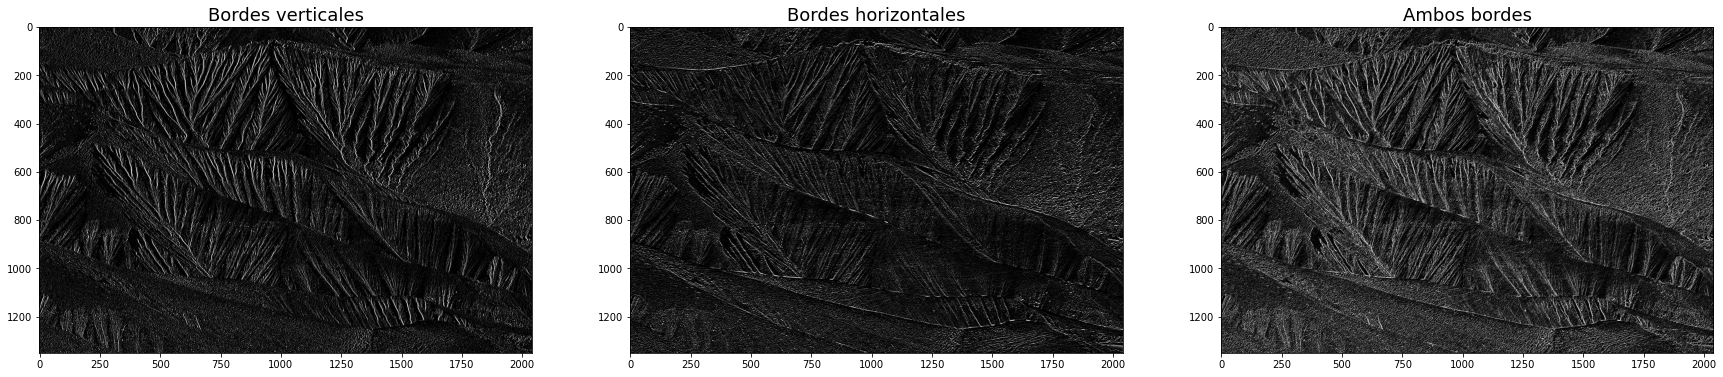

In [15]:
# Graficamos
plt.figure(1,figsize=(30,30))

plt.subplot(1,3,1)
plt.title("Bordes verticales",fontsize = 18)
plt.imshow(G_X,cmap='gray')
plt.subplot(1,3,2)
plt.title("Bordes horizontales",fontsize = 18)
plt.imshow(G_Y,cmap='gray')
plt.subplot(1,3,3)
plt.title("Ambos bordes",fontsize = 18)
plt.imshow(G,cmap='gray')

plt.show()